In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the libraries for preprocessing

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import shap

In [15]:
### Sklearn libraries for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [16]:
customer_data = pd.read_csv('/Users/maheshg/Dropbox/Sample Datasets Kaggle/Shopping Trends And Customer Behaviour Dataset.csv')

In [17]:
customer_data.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [18]:
customer_data.isna().sum()

Unnamed: 0                0
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [20]:
customer_data.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [21]:
customer_data.columns

Index(['Unnamed: 0', 'Customer ID', 'Age', 'Gender', 'Item Purchased',
       'Category', 'Purchase Amount (USD)', 'Location', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [22]:
customer_data.dropna(inplace=True)

In [23]:
kmeans_customer = KMeans(n_clusters=5, init='k-means++',max_iter=500, random_state=0)

In [28]:
customer_data.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [52]:
# Encode the 'Location' column to numeric values
location_encoded = LabelEncoder().fit_transform(customer_data[['Location','Frequency of Purchases']].values.ravel())
kmeans_customer.fit(location_encoded.reshape(-1, 1))

KMeans(max_iter=500, n_clusters=5, random_state=0)

In [53]:
print(kmeans_customer.labels_)

[3 1 3 ... 2 1 4]


In [54]:
# Fit KMeans on the correct features
kmeans_customer.fit(features)
customer_data['cluster'] = kmeans_customer.labels_
customer_data.groupby(['Category', 'cluster']).size().reset_index(name='counts')

,Category,cluster,counts
0,Accessories,0,261
1,Accessories,1,224
2,Accessories,2,266
3,Accessories,3,264
4,Accessories,4,225
5,Clothing,0,366
6,Clothing,1,318
7,Clothing,2,370
8,Clothing,3,358
9,Clothing,4,325


In [57]:
from sklearn.decomposition import PCA

# Encode each column separately
location_le = LabelEncoder()
freq_le = LabelEncoder()
location_encoded = location_le.fit_transform(customer_data['Location'])
freq_encoded = freq_le.fit_transform(customer_data['Frequency of Purchases'])

# Combine encoded columns for PCA
features = np.column_stack((location_encoded, freq_encoded))
pca = PCA(n_components=1)
pca_result = pca.fit_transform(features)

customer_data['X'] = pca_result[:, 0]
customer_data.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster,X
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1,-8.266442
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,3,-6.266445
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,3,-4.271879
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,13.728091
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,11.738956


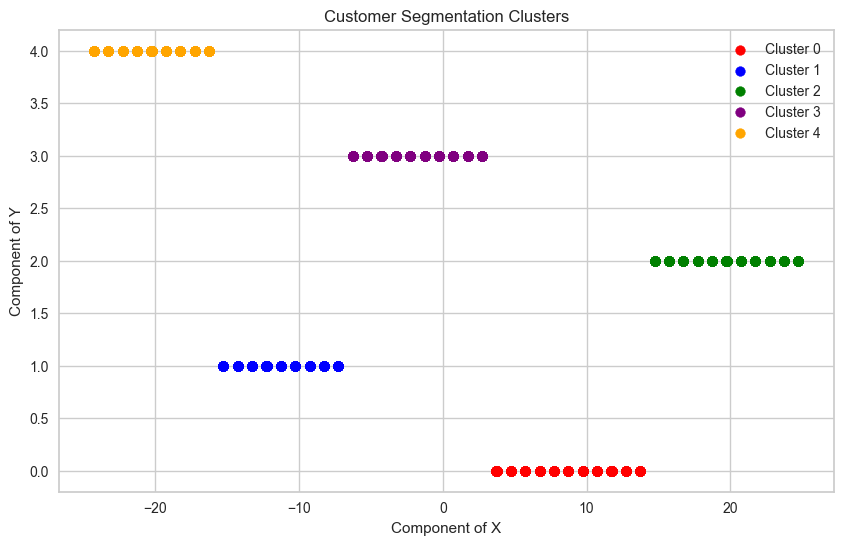

In [58]:
cluster_0 = customer_data[customer_data['cluster'] == 0]
cluster_1 = customer_data[customer_data['cluster'] == 1]
cluster_2 = customer_data[customer_data['cluster'] == 2]
cluster_3 = customer_data[customer_data['cluster'] == 3]
cluster_4 = customer_data[customer_data['cluster'] == 4]

plt.figure(figsize=(10, 6))
plt.scatter(cluster_0['X'], cluster_0['cluster'], color='red', label='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['cluster'], color='blue', label='Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['cluster'], color='green', label='Cluster 2')
plt.scatter(cluster_3['X'], cluster_3['cluster'], color='purple', label='Cluster 3')
plt.scatter(cluster_4['X'], cluster_4['cluster'], color='orange', label='Cluster 4')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Component of X')
plt.ylabel('Component of Y')
plt.legend()
plt.show()